In [ ]:
%reload_ext autoreload
%autoreload 2

In [ ]:
from fastai import *
from fastai.tabular import *

# Rossmann

## Data preparation

To create the feature-engineered filed train_clean and test_clean from the initial data, run x_009a_rossman_data_clean

In [ ]:
import pyarrow

In [ ]:
path = Path('data/rossmann/')
train_df = pd.read_feather(path/'train_clean')
test_df = pd.read_feather(path/'test_clean')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


In [ ]:
train_df.head().T

,0,1,2,3,4
index,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,False,False,False,False,False
SchoolHoliday,1,1,1,1,1


In [ ]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
    'SchoolHoliday_fw', 'SchoolHoliday_bw']

cont_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

n = len(train_df); n

844338

In [ ]:
idx = np.random.permutation(range(n))[:2000]
idx.sort()
small_train_df = train_df.iloc[idx[:1000]]
small_test_df = train_df.iloc[idx[1000:]]
small_cont_vars = ['CompetitionDistance', 'Mean_Humidity']
small_cat_vars =  ['Store', 'DayOfWeek', 'PromoInterval']
small_train_df = small_train_df[small_cat_vars+small_cont_vars + ['Sales']]
small_test_df = small_test_df[small_cat_vars+small_cont_vars + ['Sales']]

In [ ]:
small_train_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
720,722,5,None,50.0,67,9349
761,763,5,None,32240.0,61,8022
1445,334,4,"Mar,Jun,Sept,Dec",4040.0,73,6050
2302,77,3,"Jan,Apr,Jul,Oct",1090.0,54,7865
2424,199,3,"Mar,Jun,Sept,Dec",6360.0,63,9121


In [ ]:
small_test_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
418845,276,4,"Mar,Jun,Sept,Dec",2960.0,51,4892
418998,429,4,"Jan,Apr,Jul,Oct",16350.0,67,5242
419398,830,4,"Jan,Apr,Jul,Oct",6320.0,51,6087
420007,325,3,"Feb,May,Aug,Nov",350.0,59,7110
420692,1011,3,"Feb,May,Aug,Nov",490.0,59,9483


In [ ]:
categorify = Categorify(small_cat_vars, small_cont_vars)
categorify(small_train_df)
categorify(small_test_df, test=True)

In [ ]:
small_test_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
418845,276.0,4,"Mar,Jun,Sept,Dec",2960.0,51,4892
418998,429.0,4,"Jan,Apr,Jul,Oct",16350.0,67,5242
419398,830.0,4,"Jan,Apr,Jul,Oct",6320.0,51,6087
420007,325.0,3,"Feb,May,Aug,Nov",350.0,59,7110
420692,NaN,3,"Feb,May,Aug,Nov",490.0,59,9483


In [ ]:
small_train_df['PromoInterval'].cat.codes[:5]

720    -1
761    -1
1445    2
2302    1
2424    2
dtype: int8

In [ ]:
small_test_df['Store'].cat.codes[:5]

418845    147
418998    234
419398    481
420007    173
420692     -1
dtype: int16

In [ ]:
fill_missing = FillMissing(small_cat_vars, small_cont_vars)
fill_missing(small_train_df)
fill_missing(small_test_df, test=True)

In [ ]:
small_train_df[small_train_df['CompetitionDistance_na'] == True]

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales,CompetitionDistance_na
18160,291,1,NaN,2620.0,83,12663,True
36083,291,3,NaN,2620.0,77,5479,True
88124,291,1,NaN,2620.0,77,10660,True
311084,291,3,NaN,2620.0,73,9244,True
331651,291,5,NaN,2620.0,81,6994,True


In [ ]:
small_test_df[small_test_df['CompetitionDistance_na'] == True]

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales,CompetitionDistance_na
584834,NaN,2,"Feb,May,Aug,Nov",2620.0,96,4772,True
611734,NaN,1,"Feb,May,Aug,Nov",2620.0,75,6035,True
745902,NaN,3,NaN,2620.0,70,3654,True
760633,NaN,2,"Feb,May,Aug,Nov",2620.0,83,3179,True
815761,291.0,4,NaN,2620.0,66,7531,True


TODO: add something about Normalize

In [ ]:
train_df = pd.read_feather(path/'train_clean')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


In [ ]:
procs=[FillMissing, Categorify, Normalize]

In [ ]:
cat_names = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
    'SchoolHoliday_fw', 'SchoolHoliday_bw']

cont_names = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

In [ ]:
dep_var = 'Sales'
train_df = pd.read_feather(path/'train_clean')
df = train_df[cat_vars+cont_vars+[dep_var, 'Date']].copy()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


In [ ]:
test_df['Date'].min(), test_df['Date'].max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [ ]:
len(test_df)

41088

In [ ]:
cut = train_df['Date'][(train_df['Date'] == train_df['Date'][len(test_df)])].index.max()
cut

41395

In [ ]:
valid_idx = range(cut)

In [ ]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                   .split_by_idx(valid_idx)
                   .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
                   .databunch())

## Model

In [ ]:
max_log_y = np.log(np.max(train_df['Sales']))
y_range = torch.tensor([0, max_log_y*1.2], device=defaults.device)

In [ ]:
emb_szs = data.get_emb_szs({})

In [ ]:
model = TabularModel(emb_szs, len(cont_vars), 1, [1000,500], [0.001,0.01], emb_drop=0.04, y_range=y_range)

In [ ]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(1116, 50)
    (1): Embedding(8, 5)
    (2): Embedding(4, 3)
    (3): Embedding(13, 7)
    (4): Embedding(32, 17)
    (5): Embedding(3, 2)
    (6): Embedding(26, 14)
    (7): Embedding(27, 14)
    (8): Embedding(5, 3)
    (9): Embedding(4, 3)
    (10): Embedding(4, 3)
    (11): Embedding(24, 13)
    (12): Embedding(9, 5)
    (13): Embedding(13, 7)
    (14): Embedding(53, 27)
    (15): Embedding(22, 12)
    (16): Embedding(7, 4)
    (17): Embedding(7, 4)
    (18): Embedding(4, 3)
    (19): Embedding(4, 3)
    (20): Embedding(9, 5)
    (21): Embedding(9, 5)
    (22): Embedding(3, 2)
    (23): Embedding(3, 2)
  )
  (emb_drop): Dropout(p=0.04)
  (bn_cont): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=229, out_features=1000, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
[len(v) for k,v in data.train_ds.classes.items()]

[1115,
 7,
 3,
 12,
 31,
 2,
 25,
 26,
 4,
 3,
 3,
 23,
 8,
 12,
 52,
 21,
 6,
 6,
 3,
 3,
 8,
 8,
 2,
 2]

In [ ]:
len(data.train_ds.cont_names)

16

In [ ]:
learn = Learner(data, model)
learn.loss_fn = F.mse_loss
learn.metrics = [exp_rmspe]

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


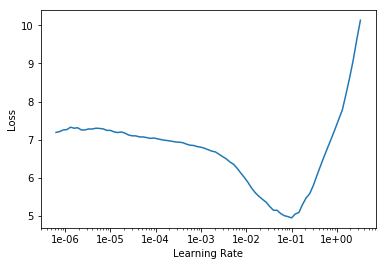

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, 1e-3, wd=0.2, pct_start=0.2)

Total time: 13:27
epoch  train_loss  valid_loss  exp_rmspe
1      0.021706    0.019131    0.586892   (02:38)
2      0.019761    0.016307    0.631732   (02:42)
3      0.016764    0.016188    0.644211   (02:42)
4      0.012963    0.011598    0.630723   (02:42)
5      0.010889    0.011673    0.613048   (02:42)



In [ ]:
learn.fit_one_cycle(5, 1e-3, wd=0.1, pct_start=0.3)

In [ ]:
with torch.no_grad():
    pct_var,cnt = 0.,0
    for x,y in learn.data.valid_dl:
        out = learn.model(*x)
        cnt += y.size(0)
        y, out = torch.exp(y), torch.exp(out)
        pct_var += ((y - out)/y).pow(2).sum()
torch.sqrt(pct_var/cnt).item()

6.3370771408081055